In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

<h2>Carregar e inspecionar os dados</h2>

In [5]:
dataset = pd.read_csv("Dataset.csv")
dataset.head()

,Idade,Renda Anual (em $),Gênero,Tempo no Site (min),Anúncio Clicado,Compra (0 ou 1)
0,29.0,30000.0,Feminino,5.741706,Não,0
1,58.0,50000.0,Feminino,21.885505,Sim,0
2,50.0,70000.0,Feminino,6.121339,Não,1
3,21.0,100000.0,Feminino,16.264925,Não,0
4,59.0,50000.0,Feminino,28.235667,Sim,1


<h2>Análise Exploratória dos Dados</h2>

<h3>Verificar informações gerais do Dataset</h3>

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Idade                190 non-null    float64
 1   Renda Anual (em $)   189 non-null    float64
 2   Gênero               193 non-null    object 
 3   Tempo no Site (min)  200 non-null    float64
 4   Anúncio Clicado      190 non-null    object 
 5   Compra (0 ou 1)      200 non-null    int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 9.5+ KB


In [7]:
print(dataset.columns)

Index(['Idade', 'Renda Anual (em $)', 'Gênero', 'Tempo no Site (min)',
       'Anúncio Clicado', 'Compra (0 ou 1)'],
      dtype='object')


<h3>A quantidade de valores ausentes de cada variável são, respectivamente:</h3>

In [8]:
print(dataset.isnull().sum())

Idade                  10
Renda Anual (em $)     11
Gênero                  7
Tempo no Site (min)     0
Anúncio Clicado        10
Compra (0 ou 1)         0
dtype: int64


<h3>Estatísticas descritivas:</h3>

In [9]:
print(dataset.describe())

            Idade  Renda Anual (em $)  Tempo no Site (min)  Compra (0 ou 1)
count  190.000000          189.000000           200.000000       200.000000
mean    38.510526        58253.968254            17.349090         0.330000
std     12.679918        25612.061811             7.724088         0.471393
min     18.000000        30000.000000            -1.000000         0.000000
25%     28.000000        30000.000000            10.860240         0.000000
50%     38.000000        50000.000000            18.197552         0.000000
75%     50.000000        70000.000000            23.887341         1.000000
max     59.000000       100000.000000            29.853484         1.000000


<h3>Visualizar distribuições de variáveis numéricas</h3>

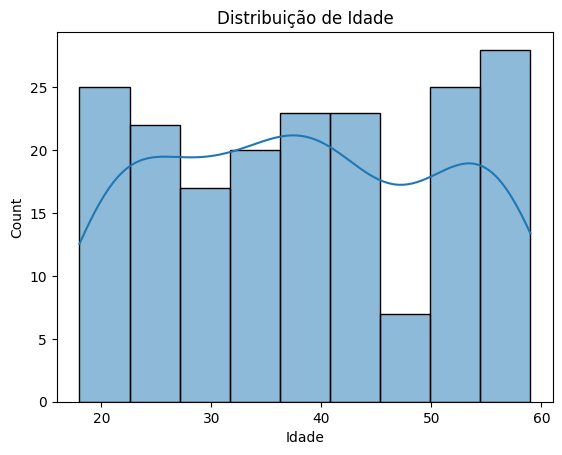

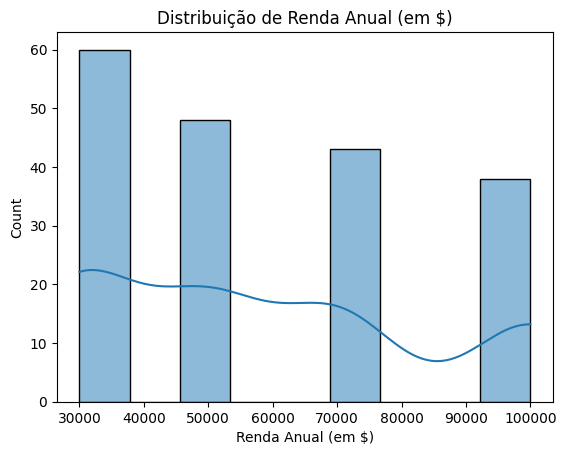

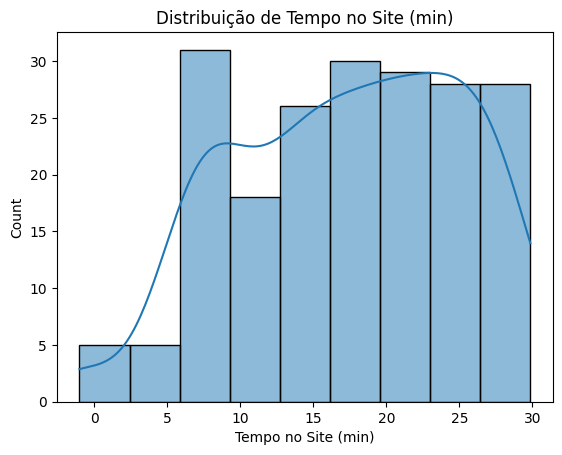

In [12]:
num_cols = ['Idade', 'Renda Anual (em $)', 'Tempo no Site (min)']
for col in num_cols:
    sns.histplot(dataset[col], kde=True)
    plt.title(f'Distribuição de {col}')
    plt.show()

<p>No gráfico de Distribuição de idade, pode-se observar que a faixa etária predominante está entre 25 e 35 anos.</p>
<p>Na Distribuição de Renda, pode-se analisar que a maioria dos usuários possui uma renda anual baixa.</p>
<p>Na Distribuição de Tempo no Site, observa-se que a maioria dos usuários fica cerca de 15-25 min no site.</p>

<h3>Pairplot para observar relação entre variáveis</h3>

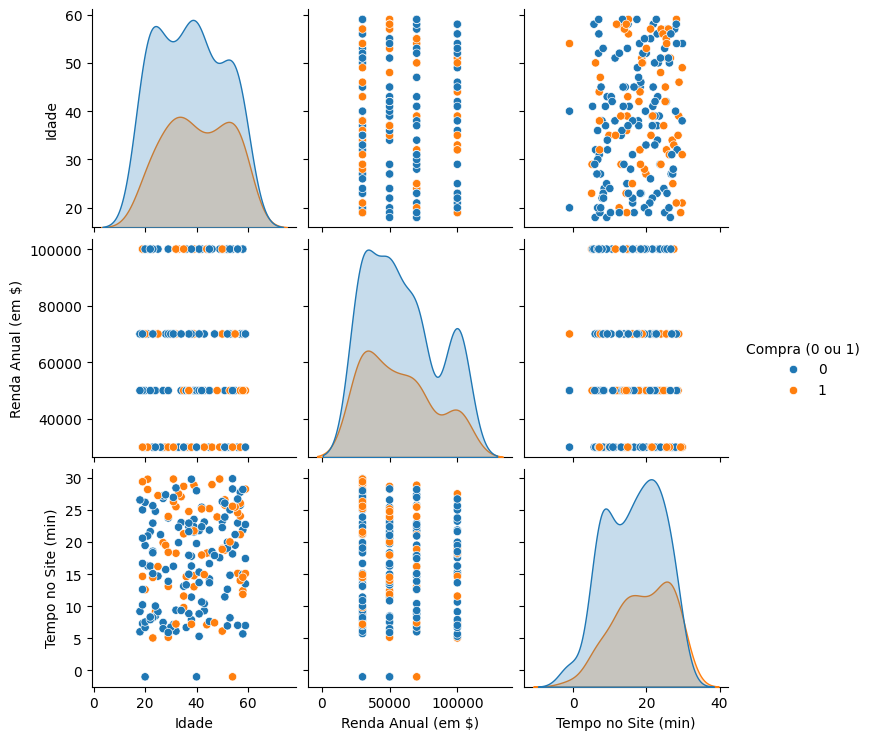

In [19]:
sns.pairplot(dataset, hue='Compra (0 ou 1)')
plt.show()

<h2>Tratamento dos dados</h2>

<p>Tratamento de valores ausentes (exemplo: preenchimento com a média para variáveis numéricas)</p>

In [10]:
dataset.fillna({'Idade': dataset['Idade'].mean()}, inplace=True)
dataset.fillna({'Renda Anual (em $)': dataset['Renda Anual (em $)'].mean()}, inplace=True)
dataset.fillna({'Tempo no Site (min)': dataset['Tempo no Site (min)'].mean()}, inplace=True)

<p>Remover linhas com valores ausentes em variáveis categóricas, se necessário</p>

In [11]:
dataset.dropna(subset=['Gênero', 'Anúncio Clicado'], inplace=True)

<h2>Pré-processamento dos dados</h2>

<h3>Codificar variáveis categóricas:</h3>

<p>Codificar 'Gênero' e 'Anúncio Clicado'</p>

In [12]:
label_encoder = LabelEncoder()
dataset['Gênero'] = label_encoder.fit_transform(dataset['Gênero'])
dataset['Anúncio Clicado'] = label_encoder.fit_transform(dataset['Anúncio Clicado'])

<h3>Dividir os dados em treino e teste:</h3>

<p>Separar variáveis independentes (X) e a variável alvo (y)</p>

In [13]:
X = dataset.drop('Compra (0 ou 1)', axis=1)
y = dataset['Compra (0 ou 1)']

<p>Dividir os dados em conjuntos de treino e teste</p>

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<h3>Normalizar variáveis numéricas:</h3>

In [15]:
scaler = StandardScaler()
num_cols = ['Idade', 'Renda Anual (em $)', 'Tempo no Site (min)']

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

<h2>Construção do Modelo de Classificação</h2>

<h3>Treinar o modelo de Regressão Logística:</h3>

In [16]:
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
print("\n--- Regressão Logística ---")
print(classification_report(y_test, y_pred_log))
print("Acurácia:", accuracy_score(y_test, y_pred_log))


--- Regressão Logística ---
              precision    recall  f1-score   support

           0       0.70      0.97      0.82        39
           1       0.00      0.00      0.00        16

    accuracy                           0.69        55
   macro avg       0.35      0.49      0.41        55
weighted avg       0.50      0.69      0.58        55

Acurácia: 0.6909090909090909


<h3>Treinar o modelo de Árvore de Decisão:</h3>

In [65]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_tree = decision_tree.predict(X_test)
print("\n--- Árvore de Decisão ---")
print(classification_report(y_test, y_pred_tree))
print("Acurácia:", accuracy_score(y_test, y_pred_tree))


--- Árvore de Decisão ---
              precision    recall  f1-score   support

           0       0.58      0.86      0.69        35
           1       0.38      0.12      0.18        25

    accuracy                           0.55        60
   macro avg       0.48      0.49      0.44        60
weighted avg       0.49      0.55      0.48        60

Acurácia: 0.55


<h3>Otimização de Hiperparâmetros para Árvore de Decisão</h3>

In [17]:
param_grid_tree = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_tree = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_tree, cv=5, scoring='accuracy')
grid_tree.fit(X_train, y_train)
print("\n--- Melhor configuração para Árvore de Decisão ---")
print(grid_tree.best_params_)


--- Melhor configuração para Árvore de Decisão ---
{'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}


<h3>Treinar o modelo de Random Forest:</h3>

In [18]:
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
print("\n--- Random Forest ---")
print(classification_report(y_test, y_pred_rf))
print("Acurácia:", accuracy_score(y_test, y_pred_rf))


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.71      0.87      0.78        39
           1       0.29      0.12      0.17        16

    accuracy                           0.65        55
   macro avg       0.50      0.50      0.48        55
weighted avg       0.59      0.65      0.60        55

Acurácia: 0.6545454545454545


<h3>Otimização de Hiperparâmetros para Random Forest</h3>

In [24]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)
print("\n--- Melhor configuração para Random Forest ---")
print(grid_rf.best_params_)


--- Melhor configuração para Random Forest ---
{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}


<h3>Validação Cruzada para Random Forest</h3>

In [25]:
cv_scores = cross_val_score(RandomForestClassifier(**grid_rf.best_params_, random_state=42), X, y, cv=5, scoring='accuracy')
print("\n--- Validação Cruzada (Random Forest) ---")
print("Scores:", cv_scores)
print("Média da Acurácia:", np.mean(cv_scores))


--- Validação Cruzada (Random Forest) ---
Scores: [0.7027027  0.54054054 0.7027027  0.66666667 0.61111111]
Média da Acurácia: 0.6447447447447447


<h2>Importância das Variáveis no Random Forest</h2>

In [29]:
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': random_forest.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\n--- Importância das Variáveis ---")
print(feature_importances)


--- Importância das Variáveis ---
               Feature  Importance
3  Tempo no Site (min)    0.471787
0                Idade    0.308740
1   Renda Anual (em $)    0.118667
2               Gênero    0.052112
4      Anúncio Clicado    0.048694


<p>Visualizar importância</p>

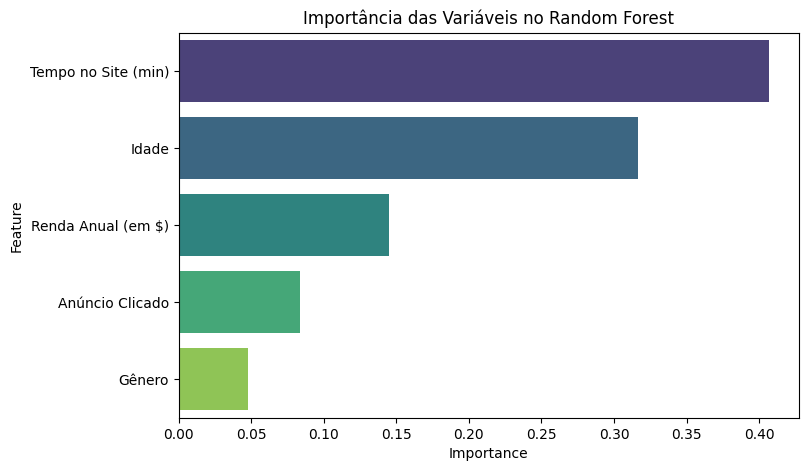

In [72]:
plt.figure(figsize=(8, 5))
sns.barplot(data=feature_importances, x='Importance', y='Feature', hue='Feature',dodge= False, palette='viridis', legend = False)
plt.title('Importância das Variáveis no Random Forest')
plt.show()

<h2>Proposta de melhoria</h2>

<h3>Baseando-se nos resultados acima, podemos propor os seguintes ajustes:</h3>

<p>Verificar correlações entre as variáveis e criar novas features, como interações entre variáveis ou agrupamento de faixas etárias.</p>
<p>Implementar mais validações, como validação cruzada estratificada.
</p>